In [266]:
# Import pandasa, os, and matplotlib.pyplot modules.

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [267]:
# Import data.

df_flight = pd.read_csv('flights.csv')
df_airport = pd.read_csv('airports.csv')
df_airline = pd.read_csv('airlines.csv')

C:\Users\wfgyi\AppData\Local\Temp\ipykernel_22152\3906611510.py:3: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_flight = pd.read_csv('flights.csv')


In [268]:
df_flight.info()
df_airport.info()
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [269]:
df_flight.sample(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5402391,2015,12,4,5,AA,293,N789AA,JFK,LAX,2000,...,2310.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
345916,2015,1,23,5,DL,2563,N347NB,SLC,SNA,1502,...,1536.0,-18.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3031428,2015,7,9,4,AA,545,N919US,LAX,PHX,1620,...,1744.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3862458,2015,8,28,5,DL,1933,N394DA,CVG,LAX,930,...,1048.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1102137,2015,3,13,5,US,654,N566UW,JFK,PHX,1330,...,1613.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [270]:
# Delete rows irrelevant to the investigation here.
irrelevant = ['DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'ELAPSED_TIME', 'SCHEDULED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME']
df_flight = df_flight[df_flight.columns[~df_flight.columns.isin(irrelevant)]]

# Verify if all data entry 'YEAR' is 2015.  If so, delete 'YEAR' column.  
print(df_flight['YEAR'].mean())
df_flight.drop('YEAR', axis=1, inplace=True)

df_flight.info()
df_flight.head(3)

2015.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 18 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY                  int64  
 2   DAY_OF_WEEK          int64  
 3   AIRLINE              object 
 4   FLIGHT_NUMBER        int64  
 5   TAIL_NUMBER          object 
 6   ORIGIN_AIRPORT       object 
 7   DESTINATION_AIRPORT  object 
 8   SCHEDULED_DEPARTURE  int64  
 9   ARRIVAL_DELAY        float64
 10  DIVERTED             int64  
 11  CANCELLED            int64  
 12  CANCELLATION_REASON  object 
 13  AIR_SYSTEM_DELAY     float64
 14  SECURITY_DELAY       float64
 15  AIRLINE_DELAY        float64
 16  LATE_AIRCRAFT_DELAY  float64
 17  WEATHER_DELAY        float64
dtypes: float64(6), int64(7), object(5)
memory usage: 799.1+ MB


,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,4,AS,98,N407AS,ANC,SEA,5,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,4,US,840,N171US,SFO,CLT,20,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [271]:
df_flight.isnull().any()

MONTH                  False
DAY                    False
DAY_OF_WEEK            False
AIRLINE                False
FLIGHT_NUMBER          False
TAIL_NUMBER             True
ORIGIN_AIRPORT         False
DESTINATION_AIRPORT    False
SCHEDULED_DEPARTURE    False
ARRIVAL_DELAY           True
DIVERTED               False
CANCELLED              False
CANCELLATION_REASON     True
AIR_SYSTEM_DELAY        True
SECURITY_DELAY          True
AIRLINE_DELAY           True
LATE_AIRCRAFT_DELAY     True
WEATHER_DELAY           True
dtype: bool

In [272]:
# Verify that the total number of missing 'ARRIVAL_DELAY' values equals the total number of 
#'DIVERTED' and 'CANCELLED' flights. 
df_flight['DIVERTED'].sum() + df_flight['CANCELLED'].sum()

105071

In [273]:
# Drop flights that arrive early or on time.
df_flight = df_flight.drop(df_flight[df_flight.ARRIVAL_DELAY <= 0].index)
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2191967 entries, 2 to 5819078
Data columns (total 18 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY                  int64  
 2   DAY_OF_WEEK          int64  
 3   AIRLINE              object 
 4   FLIGHT_NUMBER        int64  
 5   TAIL_NUMBER          object 
 6   ORIGIN_AIRPORT       object 
 7   DESTINATION_AIRPORT  object 
 8   SCHEDULED_DEPARTURE  int64  
 9   ARRIVAL_DELAY        float64
 10  DIVERTED             int64  
 11  CANCELLED            int64  
 12  CANCELLATION_REASON  object 
 13  AIR_SYSTEM_DELAY     float64
 14  SECURITY_DELAY       float64
 15  AIRLINE_DELAY        float64
 16  LATE_AIRCRAFT_DELAY  float64
 17  WEATHER_DELAY        float64
dtypes: float64(6), int64(7), object(5)
memory usage: 317.7+ MB


<class 'pandas.core.series.Series'>
Int64Index: 2191967 entries, 2 to 5819078
Series name: ARRIVAL_DELAY
Non-Null Count    Dtype  
--------------    -----  
2191967 non-null  float64
dtypes: float64(1)
memory usage: 33.4 MB


(array([1.128528e+06, 4.128350e+05, 2.034950e+05, 1.215180e+05,
        7.977000e+04, 5.658300e+04, 4.151500e+04, 3.146700e+04,
        2.407500e+04, 1.870400e+04, 1.436200e+04, 1.125400e+04,
        8.947000e+03, 6.969000e+03, 5.636000e+03, 4.445000e+03,
        3.631000e+03, 2.892000e+03, 2.298000e+03, 1.894000e+03,
        1.616000e+03, 1.373000e+03, 1.096000e+03, 9.180000e+02,
        7.520000e+02, 6.180000e+02, 5.460000e+02]),
 array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150, 165, 180,
        195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360, 375,
        390, 405]),
 <BarContainer object of 27 artists>)

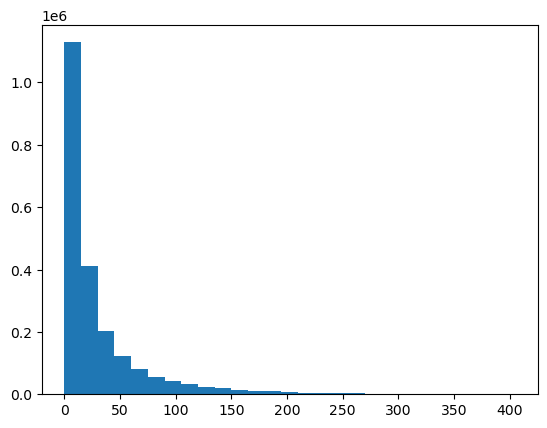

In [274]:
# For 'DIVERTED' and 'CANCELLED' flights, replace 'ARRIVAL_DELAY' NaN values with 0.  Run histogram.
df_flight['ARRIVAL_DELAY'] = df_flight['ARRIVAL_DELAY'].fillna(0)
df_flight['ARRIVAL_DELAY'].info()
plt.hist(df_flight['ARRIVAL_DELAY'], bins=range(0,420,15))

In [275]:
df_flight.isnull().sum()


MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
ARRIVAL_DELAY                0
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    2102083
AIR_SYSTEM_DELAY       1128528
SECURITY_DELAY         1128528
AIRLINE_DELAY          1128528
LATE_AIRCRAFT_DELAY    1128528
WEATHER_DELAY          1128528
dtype: int64

In [276]:
# Since all columns containing NaN values do not directly relate to our investigation which
# targets at the impact of airports, airlines and flights on flight delays and cancellations,
# these columns will be dropped.
null_col = ['TAIL_NUMBER', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
df_flight = df_flight[df_flight.columns[~df_flight.columns.isin(null_col)]]

In [277]:
df_flight.sample(5)
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2191967 entries, 2 to 5819078
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY                  int64  
 2   DAY_OF_WEEK          int64  
 3   AIRLINE              object 
 4   FLIGHT_NUMBER        int64  
 5   ORIGIN_AIRPORT       object 
 6   DESTINATION_AIRPORT  object 
 7   SCHEDULED_DEPARTURE  int64  
 8   ARRIVAL_DELAY        float64
 9   DIVERTED             int64  
 10  CANCELLED            int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 200.7+ MB


In [278]:
# Check duplicate records.
df_flight['index_origin'] = df_flight.groupby(['MONTH', 'DAY', 'AIRLINE', 'FLIGHT_NUMBER', 'ORIGIN_AIRPORT']).MONTH.transform('idxmin')    
duplicate = df_flight[df_flight.duplicated(subset=['MONTH','DAY','AIRLINE', 'FLIGHT_NUMBER', 'ORIGIN_AIRPORT'], keep='first')]

In [279]:
print(duplicate)

         MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
3883017      8   29            6      AA            803            STT   

        DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ARRIVAL_DELAY  DIVERTED  \
3883017                 SJU                 1435            0.0         0   

         CANCELLED  index_origin  
3883017          1       3883016  


In [280]:
# Check out the duplicated records and confirmed that they are not duplicate dues to different
# destination airports.
print(df_flight.iloc[[1556755, 1556756]])

         MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
3883016      8   29            6      AA            803            STT   
3883017      8   29            6      AA            803            STT   

        DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ARRIVAL_DELAY  DIVERTED  \
3883016                 CLT                 1435            0.0         0   
3883017                 SJU                 1435            0.0         0   

         CANCELLED  index_origin  
3883016          1       3883016  
3883017          1       3883016  


In [281]:
# Add 'ORIGIN_AIRPORT' and 'ORIGIN_STATE' to df by left joining df_airport with df.
df_airport = df_airport.drop(['LATITUDE','LONGITUDE', 'COUNTRY','AIRPORT'], axis=1)
df_airport.rename(columns = {'IATA_CODE':'ORIGIN_AIRPORT'}, inplace = True)

df = pd.merge(df_flight, df_airport, how = 'left', on = ['ORIGIN_AIRPORT'])
df.rename(columns = {'CITY':'ORIGIN_CITY', 'STATE':'ORIGIN_STATE'}, inplace = True)

In [282]:
# Check the null values of 'ORIGIN_CITY' and 'ORIGIN_STATE'. Replace with 'Unknown'.
df[df['ORIGIN_CITY'].isna()]
df = df.fillna('Unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2191967 entries, 0 to 2191966
Data columns (total 14 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY                  int64  
 2   DAY_OF_WEEK          int64  
 3   AIRLINE              object 
 4   FLIGHT_NUMBER        int64  
 5   ORIGIN_AIRPORT       object 
 6   DESTINATION_AIRPORT  object 
 7   SCHEDULED_DEPARTURE  int64  
 8   ARRIVAL_DELAY        float64
 9   DIVERTED             int64  
 10  CANCELLED            int64  
 11  index_origin         int64  
 12  ORIGIN_CITY          object 
 13  ORIGIN_STATE         object 
dtypes: float64(1), int64(8), object(5)
memory usage: 250.9+ MB


In [283]:
# Repeat the above process for the destination airports.
df_airport.rename(columns = {'ORIGIN_AIRPORT':'DESTINATION_AIRPORT'}, inplace = True)

df = pd.merge(df, df_airport, how = 'left', on = ['DESTINATION_AIRPORT'])
df.rename(columns = {'CITY':'DESTINATION_CITY', 'STATE':'DESTINATION_STATE'}, inplace = True)

df = df.fillna('Unknown')

In [284]:
# Add airline name to the df by left join.
df.rename(columns = {'AIRLINE':'IATA_CODE'}, inplace = True)
df = pd.merge(df, df_airline, how = 'left', on = ['IATA_CODE'])

In [285]:
# Double check to ensure all numbers match and fit.
delayed = np.count_nonzero(df['ARRIVAL_DELAY'])
diverted = df['DIVERTED'].sum()
cancelled = df['CANCELLED'].sum()

print('Total Delayed:', delayed)
print('Total Divereted:', diverted)
print('Total Cancelled:', cancelled)
print('Total:', delayed + diverted + cancelled)

Total Delayed: 2086896
Total Divereted: 15187
Total Cancelled: 89884
Total: 2191967


In [286]:
df.sample(5)

,MONTH,DAY,DAY_OF_WEEK,IATA_CODE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,ARRIVAL_DELAY,DIVERTED,CANCELLED,index_origin,ORIGIN_CITY,ORIGIN_STATE,DESTINATION_CITY,DESTINATION_STATE,AIRLINE
1300003,7,19,7,WN,1757,LAS,MAF,1635,46.0,0,0,3199350,Las Vegas,NV,Midland,TX,Southwest Airlines Co.
136106,1,20,2,AA,1550,LAX,BOS,1525,53.0,0,0,299191,Los Angeles,CA,Boston,MA,American Airlines Inc.
51545,1,6,2,UA,1412,ORD,OMA,1514,49.0,0,0,88630,Chicago,IL,Omaha,NE,United Air Lines Inc.
526595,3,20,5,AA,1682,PHX,SNA,1355,3.0,0,0,1217092,Phoenix,AZ,Santa Ana,CA,American Airlines Inc.
211554,2,2,1,EV,5972,IAH,DAL,2105,2.0,0,0,498704,Houston,TX,Dallas,TX,Atlantic Southeast Airlines


In [287]:
df.isna().sum()

MONTH                  0
DAY                    0
DAY_OF_WEEK            0
IATA_CODE              0
FLIGHT_NUMBER          0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
index_origin           0
ORIGIN_CITY            0
ORIGIN_STATE           0
DESTINATION_CITY       0
DESTINATION_STATE      0
AIRLINE                0
dtype: int64